# Dataset 3 - Banking Dataset

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset into memory
df = pd.read_csv('banking.csv')

In [3]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [4]:
#Dropping rows with null values
# df = df.dropna()

In [5]:
#display shape
df.shape

(41188, 21)

In [6]:
#display first 5 records 
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [7]:
#display datatypes of columns
df.dtypes 

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [8]:
# column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

# Preprocessing Categorical variables

## There are 10 categorical attributes and we will handle them one by one

# Preprocessing job column

In [9]:
# Finding counts of unique values
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [10]:
#Discretizing the job column
df["job"] = df["job"].map({'admin.':1, 'blue-collar':2, 'technician':3, 'services':4, 'management':5, 'retired':6, 'entrepreneur':7, 'self-employed':8, 'housemaid':9, 'unemployed':10, 'student':11, 'unknown':12  })

# Finding counts of unique values
df['job'].value_counts()

1     10422
2      9254
3      6743
4      3969
5      2924
6      1720
7      1456
8      1421
9      1060
10     1014
11      875
12      330
Name: job, dtype: int64

# Preprocessing marital column

In [11]:
# Finding counts of unique values
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [12]:
#Discretizing the marital column
df["marital"] = df["marital"].map({'married':1, 'single':2, 'divorced':3, 'unknown':4})

# Finding counts of unique values
df['marital'].value_counts()

1    24928
2    11568
3     4612
4       80
Name: marital, dtype: int64

# Preprocessing education column

In [13]:
# Finding counts of unique values
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [14]:
#Discretizing the education column
df["education"] = df["education"].map({'university.degree':1, 'high.school':2, 'basic.9y':3, 'professional.course':4, 'basic.4y':5, 'basic.6y':6, 'unknown':7, 'illiterate':8})

# Finding counts of unique values
df['education'].value_counts()

1    12168
2     9515
3     6045
4     5243
5     4176
6     2292
7     1731
8       18
Name: education, dtype: int64

# Preprocessing default column

In [15]:
# Finding counts of unique values
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [16]:
#Discretizing the default column
df["default"] = df["default"].map({'no':1, 'unknown':2, 'yes':3})

# Finding counts of unique values
df['default'].value_counts()

1    32588
2     8597
3        3
Name: default, dtype: int64

# Preprocessing housing column

In [17]:
# Finding counts of unique values
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [18]:
#Discretizing the housing column
df["housing"] = df["housing"].map({'yes':1, 'no':2, 'unknown':3})

# Finding counts of unique values
df['housing'].value_counts()

1    21576
2    18622
3      990
Name: housing, dtype: int64

# Preprocessing loan column

In [19]:
# Finding counts of unique values
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [20]:
#Discretizing the loan column
df["loan"] = df["loan"].map({'yes':1, 'no':2, 'unknown':3})

# Finding counts of unique values
df['loan'].value_counts()

2    33950
1     6248
3      990
Name: loan, dtype: int64

# Preprocessing contact column

In [21]:
# Finding counts of unique values
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [22]:
#Discretizing the contact column
df["contact"] = df["contact"].map({'cellular':1, 'telephone':2})

# Finding counts of unique values
df['contact'].value_counts()

1    26144
2    15044
Name: contact, dtype: int64

# Preprocessing month column 

In [23]:
# Finding counts of unique values
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [24]:
#Discretizing the month column
df["month"] = df["month"].map({'may':1, 'jul':2, 'aug':3, 'jun':4, 'nov':5, 'apr':6,'oct':7,'sep':8,'mar':9,'dec':10})
# Finding counts of unique values
df['month'].value_counts()

1     13769
2      7174
3      6178
4      5318
5      4101
6      2632
7       718
8       570
9       546
10      182
Name: month, dtype: int64

# Preprocessing day_of_week column 

In [25]:
# Finding counts of unique values
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [26]:
#Discretizing the day_of_week column
df["day_of_week"] = df["day_of_week"].map({'thu':1, 'mon':2, 'wed':3, 'tue':4, 'fri':5})
# Finding counts of unique values
df['day_of_week'].value_counts()

1    8623
2    8514
3    8134
4    8090
5    7827
Name: day_of_week, dtype: int64

# Preprocessing poutcome column

In [27]:
# Finding counts of unique values
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [28]:
#Discretizing the poutcome column
df["poutcome"] = df["poutcome"].map({'nonexistent':1, 'failure':2, 'success':3})

# Finding counts of unique values
df['poutcome'].value_counts()

1    35563
2     4252
3     1373
Name: poutcome, dtype: int64

# Preprocessing Continuous variables

# There are 10 numeric(continuous) variables. We will handle them one by one.

# Preprocessing age column

In [29]:
#Display total null values
print('Total Null Values in age column:')
print(df['age'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for age column:')
print(df['age'].min(), df['age'].max())

Total Null Values in age column:
0

Minimum and Maximum values for age column:
17 98


In [30]:
#Converting the datatype to float
# df['age'] = df['age'].apply(lambda x:float(x))

In [31]:
df['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

In [32]:
#Discretizing the age column to have approx. 10% data per bin
cut_label_age = ['1', '2', '3', '4', '5','6','7','8','9','10','11','12']

cut_bins = [10, 27, 30, 32, 34, 36, 38, 41, 44, 48, 52, 55, 100]

#Creating a new column using the data after binning
df['age_bin'] = pd.cut(df['age'], bins=cut_bins, labels=cut_label_age)

# Finding counts of unique values
df['age_bin'].value_counts()

2     4168
9     4040
7     3871
3     3793
12    3582
4     3578
5     3539
10    3247
1     3215
8     3208
6     2882
11    2065
Name: age_bin, dtype: int64

# Preprocessing duration column

In [33]:
#Display total null values 
print('Total Null Values in duration column:')
print(df['duration'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for duration column:')
print(df['duration'].min(), df['duration'].max())

Total Null Values in duration column:
0

Minimum and Maximum values for duration column:
0 4918


In [34]:
#Converting the datatype to float
# df['duration'] = df['duration'].apply(lambda x:int(x))

In [35]:
# Finding counts of unique values
df['duration'].value_counts()

85      170
90      170
136     168
73      167
124     164
       ... 
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

In [36]:
#Discretizing the duration column to have approx. 10% data per bin
cut_label_duration = ['1', '2', '3', '4', '5', '6', '7','8','9','10','11']

cut_bins = [-1, 50, 80,100,120,150,180,220, 270,350,500,5000]

#Creating a new column using the data after binning
df['duration_bin'] = pd.cut(df['duration'], bins=cut_bins, labels=cut_label_duration)


# Finding counts of unique values
df['duration_bin'].value_counts()


11    4928
5     4116
10    3988
9     3970
7     3914
2     3846
8     3683
6     3672
1     3198
3     2983
4     2890
Name: duration_bin, dtype: int64

# Preprocessing campaign column

In [37]:
#Display total null values
print('Total Null Values in campaign column:')
print(df['campaign'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for campaign column:')
print(df['campaign'].min(), df['campaign'].max())

Total Null Values in campaign column:
0

Minimum and Maximum values for campaign column:
1 56


In [38]:
#Converting the datatype to float
df['campaign'] = df['campaign'].apply(lambda x:int(x))

In [39]:
# Finding counts of unique values

df['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

In [40]:
#Discretizing the campaign column such that unique values from 6 to 60 for which there are very few records are merged together into one single bin
cut_label_campaign = ['1', '2', '3', '4', '5', '6']

cut_bins = [0,1,2,3,4,6,60]

#Creating a new column using the data after binning
df['campaign_bin'] = pd.cut(df['campaign'], bins=cut_bins, labels=cut_label_campaign)

# Finding counts of unique values
df['campaign_bin'].value_counts()



1    17642
2    10570
3     5341
4     2651
5     2578
6     2406
Name: campaign_bin, dtype: int64

# Preprocessing pdays column

In [41]:
#Display total null values
print('Total Null Values in pdays column:')
print(df['pdays'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for pdays column:')
print(df['pdays'].min(), df['pdays'].max())

Total Null Values in pdays column:
0

Minimum and Maximum values for pdays column:
0 999


In [42]:
#Converting the datatype to float
df['pdays'] = df['pdays'].apply(lambda x:float(x))

In [43]:
# Finding counts of unique values
df['pdays'].value_counts()

999.0    39673
3.0        439
6.0        412
4.0        118
9.0         64
2.0         61
7.0         60
12.0        58
10.0        52
5.0         46
13.0        36
11.0        28
1.0         26
15.0        24
14.0        20
8.0         18
0.0         15
16.0        11
17.0         8
18.0         7
19.0         3
22.0         3
21.0         2
20.0         1
26.0         1
27.0         1
25.0         1
Name: pdays, dtype: int64

In [44]:
#Discretizing the pdays column such that  unique values from 30 to 999 for which there are very few records are merged together into one single bin
cut_label_pdays = ['1', '2']

cut_bins = [-1,30,999]

df['pdays_bin'] = pd.cut(df['pdays'], bins=cut_bins, labels=cut_label_pdays)

# Finding counts of unique values
df['pdays_bin'].value_counts()

2    39673
1     1515
Name: pdays_bin, dtype: int64

# Preprocessing previous column

In [45]:
#Display total null values
print('Total Null Values in previous column:')
print(df['previous'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for previous column:')
print(df['previous'].min(), df['previous'].max())

Total Null Values in previous column:
0

Minimum and Maximum values for previous column:
0 7


In [46]:
#Converting the datatype to float
df['previous'] = df['previous'].apply(lambda x:int(x))

In [47]:
# Finding counts of unique values
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [48]:
#Discretizing the previous column such that unique values from 2 to 7 for which there are very few records are merged together into one single bin
cut_label_previous = ['1', '2', '3']

cut_bins = [-1, 0,1,8]

#Creating a new column using the data after binning
df['previous_bin'] = pd.cut(df['previous'], bins=cut_bins, labels=cut_label_previous)

# Finding counts of unique values
df['previous_bin'].value_counts()

1    35563
2     4561
3     1064
Name: previous_bin, dtype: int64

# Preprocessing emp_var_rate column

In [49]:
#Display total null values
print('Total Null Values in emp_var_rate column:')
print(df['emp_var_rate'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for emp_var_rate column:')
print(df['emp_var_rate'].min(), df['emp_var_rate'].max())

Total Null Values in emp_var_rate column:
0

Minimum and Maximum values for emp_var_rate column:
-3.4 1.4


In [50]:
#Converting the datatype to float
df['emp_var_rate'] = df['emp_var_rate'].apply(lambda x:float(x))

In [51]:
# Finding counts of unique values
df['emp_var_rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp_var_rate, dtype: int64

In [52]:
#Discretizing the emp_var_rate column
#Creating a new column using the data after binning
df["emp_var_rate_bin"] = df["emp_var_rate"].map({-3.4:1, -3.0:1,  -2.9:1, -1.8:2, -1.7:3, -1.1:3,  -0.2:3, -0.1:3, 1.1:9, 1.4:10})

# Finding counts of unique values
df['emp_var_rate_bin'].value_counts()

10    16234
2      9184
9      7763
3      5101
1      2906
Name: emp_var_rate_bin, dtype: int64

# Preprocessing cons_conf_idx column

In [53]:
#Display total null values
print('Total Null Values in cons_conf_idx column:')
print(df['cons_conf_idx'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for cons_conf_idx column:')
print(df['cons_conf_idx'].min(), df['cons_conf_idx'].max())

Total Null Values in cons_conf_idx column:
0

Minimum and Maximum values for cons_conf_idx column:
-50.8 -26.9


In [54]:
#Converting the datatype to float
df['cons_conf_idx'] = df['cons_conf_idx'].apply(lambda x:float(x))

In [55]:
# Finding counts of unique values
df['cons_conf_idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons_conf_idx, dtype: int64

In [56]:
df['cons_conf_idx'].unique()

array([-36.1, -42. , -39.8, -47.1, -31.4, -42.7, -46.2, -40.8, -36.4,
       -41.8, -40.4, -26.9, -30.1, -50. , -33.6, -34.6, -40. , -38.3,
       -37.5, -49.5, -33. , -50.8, -34.8, -40.3, -29.8, -45.9])

In [57]:
#map the categories of the attributes to numbers
#Creating a new column using the data after binning
df["cons_conf_idx_bin"] = df["cons_conf_idx"].map({-26.9:1,  -29.8:1, -30.1:1, -31.4:1, -33.:1 , -33.6:1, -34.6:1,-34.8:1, -36.1:2, -36.4:3, -37.5:4, -38.3:4, -39.8:4, -40.:4,-40.3:4, -40.4:4, -40.8:4, -41.8:5, -42.:5, -42.7:6, -45.9:7,  -46.2:7, -47.1:8, -49.5:8, -50.:8 , -50.8:8})

# Finding counts of unique values
df['cons_conf_idx_bin'].value_counts()

5    7990
3    7763
6    6685
7    5804
2    5175
8    3072
1    2629
4    2070
Name: cons_conf_idx_bin, dtype: int64

# Preprocessing cons_price_idx column

In [58]:
#Display total null values
print('Total Null Values in cons_price_idx column:')
print(df['cons_price_idx'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for cons_price_idx column:')
print(df['cons_price_idx'].min(), df['cons_price_idx'].max())

Total Null Values in cons_price_idx column:
0

Minimum and Maximum values for cons_price_idx column:
92.20100000000001 94.76700000000001


In [59]:
#Converting the datatype to float
df['cons_price_idx'] = df['cons_price_idx'].apply(lambda x:float(x))

In [60]:
# Finding counts of unique values
df['cons_price_idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons_price_idx, dtype: int64

In [61]:
#Discretizing the cons_price_idx column to have approx. 10% data per bin
cut_label_cons_price_idx = ['1', '2', '3','4','5','6','7']

cut_bins = [92, 92.8, 92.9, 93.2, 93.5, 93.92, 94,95]

#Creating a new column using the data after binning
df['cons_price_idx_bin'] = pd.cut(df['cons_price_idx'], bins=cut_bins, labels=cut_label_cons_price_idx)

# Finding counts of unique values
df['cons_price_idx_bin'].value_counts()

6    7763
5    7138
3    6789
2    6076
7    5782
4    5439
1    2201
Name: cons_price_idx_bin, dtype: int64

# Preprocessing euribor3m column

In [62]:
#Display total null values
print('Total Null Values in euribor3m column:')
print(df['euribor3m'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for euribor3m column:')
print(df['euribor3m'].min(), df['euribor3m'].max())

Total Null Values in euribor3m column:
0

Minimum and Maximum values for euribor3m column:
0.634 5.045


In [63]:
#Converting the datatype to float
df['euribor3m'] = df['euribor3m'].apply(lambda x:float(x))

In [64]:
# Finding counts of unique values
df['euribor3m'].value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.329       1
0.933       1
0.996       1
1.574       1
3.282       1
Name: euribor3m, Length: 316, dtype: int64

In [65]:
#Discretizing the euribor3m column to have approx. 10% data per bin
cut_label_euribor3m = ['1', '2', '3', '4', '5','6','7','8']


cut_bins = [0, 1.1, 1.3, 1.5, 4.8, 4.86, 4.96, 4.962,6]

#Creating a new column using the data after binning
df['euribor3m_bin'] = pd.cut(df['euribor3m'], bins=cut_bins, labels=cut_label_euribor3m)

# Finding counts of unique values
df['euribor3m_bin'].value_counts()

5    7336
8    7178
6    5027
3    4580
7    4515
2    4376
1    4260
4    3916
Name: euribor3m_bin, dtype: int64

# Preprocessing nr_employed column

In [66]:
#Display total null values
print('Total Null Values in nr_employed column:')
print(df['nr_employed'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for nr_employed column:')
print(df['nr_employed'].min(), df['nr_employed'].max())

Total Null Values in nr_employed column:
0

Minimum and Maximum values for nr_employed column:
4963.6 5228.1


In [67]:
#Converting the datatype to float
df['nr_employed'] = df['nr_employed'].apply(lambda x:float(x))

In [68]:
# Finding counts of unique values
df['nr_employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr_employed, dtype: int64

In [69]:
#map the categories of the attributes to numbers 
#Creating a new column using the data after binning
df["nr_employed_bin"] = df["nr_employed"].map({4963.6:1, 4991.6:2, 5008.7:3, 5017.5:4, 5023.5:5, 5076.2:6, 5099.1:7, 5176.3:8, 5191.0:9, 5195.8:10, 5228.1:11})

# Finding counts of unique values
df['nr_employed_bin'].value_counts()

11    16234
7      8534
9      7763
10     3683
6      1663
4      1071
2       773
3       650
1       635
5       172
8        10
Name: nr_employed_bin, dtype: int64

# Q1:

## Node class

In [70]:
#creating a node class for the decision tree
class Node():
    def __init__(self, feature_index=None,left=None,right=None, value=None):
       #constructor  
        
        # decision node
        self.feature_index = feature_index
        self.left = left
        self.right = right
        
        # leaf node
        self.value = value

## Decision Tree classifier using Weight of Evidence(WOE)

## This decision tree classifier is being designed by us to be used for one attribute based split or two attribute per node based split.

In [71]:
# class for decision tree classifier 

class DecisionTreeClassifier(): 
    def __init__(self, min_samples_split=3, max_depth=3, no_of_IV=0):
        # constructor 
        
        # root of the tree 
        self.root = None
        
        # Stopping Criteria
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.no_of_IV = no_of_IV 
        
    def build_tree(self, dataset, curr_depth=0):  
        # function to build the tree 

        X, Y = dataset.iloc[:,:-1].values, dataset.iloc[:,-1].values
        num_samples, num_features = np.shape(X)
        
        # check the stopping criteria to split the node
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            
            best_split = self.get_best_split(dataset, num_samples, num_features)
        
            # building left subtree using recursion
            left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)

            # building right subtree using recursion
            right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)

            # return the decision node
            return Node(best_split["feature_index"],left_subtree, right_subtree)
        
        
        # Finding the class leaf node
        leaf_value = self.calculate_leaf_value(Y)
        
        # return the leaf node
        return Node(value=leaf_value)
      
    def get_best_split(self, dataset, num_samples, num_features): #
        # Function to get the best split based on the IV value
        
        dataset = pd.DataFrame(dataset)
        
        best_split = {}
        
        # dataframe for the categorical variables
        df_cat = dataset[['job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact','month','day_of_week', 'poutcome', 'y']]
        
        # dataframe for the continuous variables
        df_con = dataset[['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp_var_rate', 'cons_price_idx','cons_conf_idx', 'euribor3m', 'nr_employed']]
        
        # dataframe for the continuous variables including the bin variables 
        data = dataset[['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'age_bin', 'duration_bin',
       'campaign_bin', 'pdays_bin', 'previous_bin', 'emp_var_rate_bin',
       'cons_conf_idx_bin', 'cons_price_idx_bin', 'euribor3m_bin',
       'nr_employed_bin']]

        #Target Class
        target = 'y' 
    
        #lists containing Information Value(IV) values for categorical and continuous variables
        iv_cat=[]
        iv_cat_col_name=[]
        iv_con=[]
        iv_con_col_name =[]
        
        # column names 
        feature_cat = df_cat.columns
        feature_con = df_con.columns
        
        #creating lists with IV values and their corresponding categorical attributes
        for col in feature_cat:
            df1, iv1 = self.calculate_woe_iv_cat(df_cat, col, target)
            iv_cat_col_name.append(col)
            iv_cat.append(iv1)
            
        #creating lists with IV values and their corresponding continuous attributes
        for col in feature_con:
            df2, iv2 = self.calculate_woe_iv_con(df_con,data, col, target)
            iv_con.append(iv2)
            iv_con_col_name.append(col)
            
        #concatenating the IV values and their corresponding attributes into one list
        iv_col = iv_cat_col_name + iv_con_col_name
        iv=iv_cat+iv_con

        my_dict = {"col":iv_col,"iv":iv};
        new = pd.DataFrame.from_dict(my_dict)
        
        #sorting the dataframe containg IV values in decreasing order 
#       and filtering only relevant IV values
        new_df = new.sort_values(by=['iv'], ascending=False)
        new_df1 =new_df[new_df['iv']<=0.5]

        #creating list of best one or two feature numbers/index  
        a=[]
        for i in range(self.no_of_IV):
            l=new_df1.index[new_df1['iv']==new_df1.iloc[i]['iv']] #returns list
            a.append(l)

        dataset1 =dataset.iloc[:,:31]
        feature_ind = []
        for s in a:
            feature_ind.append(s.item()+1)
            
#         print("list of IV ",feature_ind)
    
        y = dataset.iloc[:, 30].values
        z=dataset.iloc[:,feature_ind].values
        y=y.reshape(y.shape[0], 1)
        z=z.reshape(z.shape[0], len(a))
        
        #calling logistic regression to calculate new feature for splitting the node
        result= self.logistic_split(y, z, dataset1)
        
        dataset_right = pd.DataFrame()
        dataset_left = pd.DataFrame()
        
        #splitting the node
        dataset_left, dataset_right = self.split(result)
        
        # decision node values on best split
        best_split["feature_index"] = feature_ind
        best_split["dataset_left"] = dataset_left
        best_split["dataset_right"] = dataset_right
        
        return best_split
    
    def split(self, dataset): 
        
        # function to split the data 
        dataset_left = dataset[dataset.iloc[:,-1] == 0]
        dataset_right = dataset[dataset.iloc[:,-1] == 1]
        
        return dataset_left, dataset_right
    
    def logistic_split(self, y_train, X_train, dataset):

        # create logistic regression classifier using IV values
        LR=LogisticRegression(random_state=1)
      
        y_train=y_train.astype('int')
        LR.fit(X_train,y_train)
          
        #compute probabilities
        prob=LR.predict_proba(X_train)
        
        #create list with predicted values from logistic regression classifier
        LRPredict_train=[]
        for i in range(len(y_train)):
            if(prob[i][0]>=0.80):
                LRPredict_train.append(0)
            else: 
                LRPredict_train.append(1)
                
        LRPredict_train=np.array(LRPredict_train)     
       
        a=pd.DataFrame(dataset.iloc[:,:31])
        c=pd.DataFrame(LRPredict_train)

        a.reset_index(drop=True, inplace=True)
        c.reset_index(drop=True, inplace=True)
    
        frames = [a,c]  
        # Create concatenated dataframe containing given class label and predicted class label
        result = pd.concat(frames, axis=1) 

        return result
    
    def calculate_leaf_value(self, Y):
        # function to compute the leaf node 
        pred_train=[]
        Y = list(Y)

        for i in range(len(Y)):
            if(Y[i]>=0.80):
                pred_train.append(0)
            else: 
                pred_train.append(1)
       
        # the most frequent value is returned as the class label and in case of an empty sequence return nan  
        return max(pred_train, key=pred_train.count, default=np.nan)
    
    def print_tree(self, tree=None, indent=" "):
        # function to print the tree 
        threshold=0.80
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", threshold)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        # function to train the tree 
        
        dataset = np.concatenate((X, Y), axis=1)
        dataset = pd.DataFrame(dataset)
        dataset.columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'age_bin', 'duration_bin',
       'campaign_bin', 'pdays_bin', 'previous_bin', 'emp_var_rate_bin',
       'cons_conf_idx_bin', 'cons_price_idx_bin', 'euribor3m_bin',
       'nr_employed_bin', 'y']
      
        self.root = self.build_tree(dataset, 0)
    
    def calculate_woe_iv_cat(self,dataset, feature, target):
        #function to calculate WOE and IV for categorical variables
        lst = []
        dataset = pd.DataFrame(dataset)
        dataset = dataset.astype(float)

        for i in range(dataset[feature].nunique()):
            val = list(dataset[feature].unique())[i]
            lst.append({
                'bin' : val,
                'events' : dataset[(dataset[feature] == val) & (dataset[target] == 0.0)][feature].count(),
                'non_events' : dataset[(dataset[feature] == val) & (dataset[target] == 1.0)][feature].count()
            })
            d = pd.DataFrame(lst)
            d['Percent_events']  =  (d['events'] / (d['events'].sum())) * 100
            d['Percent_non_events'] = (d['non_events'] / (d['non_events'].sum())) * 100
            d['WOE'] = np.log(d['Percent_events'] / d['Percent_non_events'])
            d = d.replace({'WOE': {np.inf: 0, -np.inf: 0.5}})
            d['IV'] = (d['Percent_events']/100 - d['Percent_non_events']/100) * d['WOE']
            sum_of_IV=d['IV'].sum()

        return d, sum_of_IV
    
    def calculate_woe_iv_con(self, df,data, feature, target):
    #function to calculate WOE and IV for continuous variables
    
        #creating column names for features whose bins are created 
        feat_bin = feature + '_bin'

        grouped_df = data.groupby(feat_bin).sum()
        grouped_df.reset_index(level=0, inplace=True)

        a=data[feat_bin].value_counts().to_dict()
        d=grouped_df[[feat_bin,feature]]
        d.columns = ['bin','sum']
        d['obs'] = d['bin'].map(a)
        d = d.astype(float)
        d['percent_obs'] = d['obs']/(d['obs'].sum()) * 100
        d['percent_Y'] = (d['sum']/d['sum'].sum()) * 100
        d['WOE'] = np.log(d['percent_Y']/d['percent_obs'])
        d['IV'] = (d['percent_Y']/100 - d['percent_obs']/100) * d['WOE']
        sum_of_IV=d['IV'].sum()

        return d, sum_of_IV
    
    def predict(self, X):
        # function to predict new dataset 
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions
    
    def make_prediction(self, x, tree):
        threshold = 1
        # function to predict a single data point 
        if tree.value!=None: return tree.value
        feature_val = x[-1]
        if feature_val<=threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    

## Train-Test split using 80:20 ratio as given in question

In [72]:
#create target variable dataframe
target = df[['y']]
#create dataframe with independent variables
df = df.drop(columns = 'y')

In [73]:
#concat the dataframe
df = pd.concat([df,target],axis =1)

In [74]:
# splitting the dataset into input variables and target variables

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)

#split the data into train and test part 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=1)


# Fit the model using one attribute for the split and visualize it

In [75]:
#train the model 
classifier1 = DecisionTreeClassifier(min_samples_split=2000, max_depth=6, no_of_IV=1)
classifier1.fit(X_train,Y_train)

# #Print the tree
classifier1.print_tree()

X_[8] <= 0.8
 left:X_[10] <= 0.8
  left:X_[13] <= 0.8
    left:X_[13] <= 0.8
        left:X_[13] <= 0.8
                left:X_[13] <= 0.8
                                left:X_[13] <= 0.8
                                                                left:1
                                                                right:nan
                                right:nan
                right:nan
        right:nan
    right:0
  right:X_[20] <= 0.8
    left:nan
    right:X_[20] <= 0.8
        left:nan
        right:X_[20] <= 0.8
                left:nan
                right:X_[20] <= 0.8
                                left:nan
                                right:X_[20] <= 0.8
                                                                left:nan
                                                                right:0
 right:X_[10] <= 0.8
  left:1
  right:X_[10] <= 0.8
    left:nan
    right:X_[10] <= 0.8
        left:nan
        right:X_[10] <= 0.8
                left:nan
     

## Predictions on the test data for model with one attribute for the split

In [76]:
#make predictions
Y_pred1 = classifier1.predict(X_test) 
from sklearn.metrics import accuracy_score

#print the accuracy score
accuracy_score(Y_test, Y_pred1)

0.8856518572469045

In [77]:
# Print the classification report containing precision, recall, f1-score, support
print(metrics.classification_report(Y_test, Y_pred1))

#print the ROC_AUC score
print (roc_auc_score(Y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7301
           1       0.48      0.06      0.11       937

    accuracy                           0.89      8238
   macro avg       0.69      0.53      0.52      8238
weighted avg       0.84      0.89      0.84      8238

0.5261702282855654


## Fit the model using two attributes for the split and visualize it

In [78]:
#train the model
classifier2 = DecisionTreeClassifier(min_samples_split=2000, max_depth=6, no_of_IV=2)
classifier2.fit(X_train,Y_train)

# #Print the tree
classifier2.print_tree()

X_[8, 20] <= 0.8
 left:X_[10, 20] <= 0.8
  left:X_[7, 13] <= 0.8
    left:X_[13, 7] <= 0.8
        left:X_[13, 7] <= 0.8
                left:X_[13, 7] <= 0.8
                                left:X_[13, 7] <= 0.8
                                                                left:1
                                                                right:nan
                                right:nan
                right:nan
        right:nan
    right:0
  right:X_[20, 15] <= 0.8
    left:nan
    right:X_[20, 15] <= 0.8
        left:nan
        right:X_[20, 15] <= 0.8
                left:nan
                right:X_[20, 15] <= 0.8
                                left:nan
                                right:X_[20, 15] <= 0.8
                                                                left:nan
                                                                right:0
 right:X_[8, 10] <= 0.8
  left:1
  right:X_[13, 14] <= 0.8
    left:nan
    right:X_[13, 14] <= 0.8
        left:nan
    

## Predictions on the test data for model with two attributes for the split

In [79]:
#make predictions
Y_pred2 = classifier2.predict(X_test) 
from sklearn.metrics import accuracy_score

#print the accuracy score
accuracy_score(Y_test, Y_pred2)

0.8856518572469045

In [80]:
# Print the classification report containing precision, recall, f1-score, support
print(metrics.classification_report(Y_test, Y_pred2))

#print the ROC_AUC score
print (roc_auc_score(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7301
           1       0.48      0.06      0.11       937

    accuracy                           0.89      8238
   macro avg       0.69      0.53      0.52      8238
weighted avg       0.84      0.89      0.84      8238

0.5261702282855654


# Q2:

## Visualize custom made decision tree using one attribute 

In [81]:
# #Print the tree
classifier1.print_tree()

X_[8] <= 0.8
 left:X_[10] <= 0.8
  left:X_[13] <= 0.8
    left:X_[13] <= 0.8
        left:X_[13] <= 0.8
                left:X_[13] <= 0.8
                                left:X_[13] <= 0.8
                                                                left:1
                                                                right:nan
                                right:nan
                right:nan
        right:nan
    right:0
  right:X_[20] <= 0.8
    left:nan
    right:X_[20] <= 0.8
        left:nan
        right:X_[20] <= 0.8
                left:nan
                right:X_[20] <= 0.8
                                left:nan
                                right:X_[20] <= 0.8
                                                                left:nan
                                                                right:0
 right:X_[10] <= 0.8
  left:1
  right:X_[10] <= 0.8
    left:nan
    right:X_[10] <= 0.8
        left:nan
        right:X_[10] <= 0.8
                left:nan
     

In [82]:
# column 8 is month and column 10 is duration

# The rules can be visualized using th tree generated
# if probability (month) < =0.8 and probability (duration) < =0.8 then class =1 

## Visualize custom made decision tree using two attribute 

In [83]:
# #Print the tree
classifier2.print_tree()

X_[8, 20] <= 0.8
 left:X_[10, 20] <= 0.8
  left:X_[7, 13] <= 0.8
    left:X_[13, 7] <= 0.8
        left:X_[13, 7] <= 0.8
                left:X_[13, 7] <= 0.8
                                left:X_[13, 7] <= 0.8
                                                                left:1
                                                                right:nan
                                right:nan
                right:nan
        right:nan
    right:0
  right:X_[20, 15] <= 0.8
    left:nan
    right:X_[20, 15] <= 0.8
        left:nan
        right:X_[20, 15] <= 0.8
                left:nan
                right:X_[20, 15] <= 0.8
                                left:nan
                                right:X_[20, 15] <= 0.8
                                                                left:nan
                                                                right:0
 right:X_[8, 10] <= 0.8
  left:1
  right:X_[13, 14] <= 0.8
    left:nan
    right:X_[13, 14] <= 0.8
        left:nan
    

In [84]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'age_bin', 'duration_bin',
       'campaign_bin', 'pdays_bin', 'previous_bin', 'emp_var_rate_bin',
       'cons_conf_idx_bin', 'cons_price_idx_bin', 'euribor3m_bin',
       'nr_employed_bin', 'y'],
      dtype='object')

In [85]:
# column 8 is month, column 10 is duration, column 7 is contact, column 13 is previous and column 20 is age_bin

# The rules can be visualized using th tree generated
# if probability (month and age_bin) < =0.8 and probability (duration and age_bin) < =0.8 and probability (contact and previous) then class =1 

## Normal Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

# Train the decision tree classifier using scikit learn
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2000,min_samples_leaf=1, max_depth=6)
dt.fit(X_train,Y_train)

#Make Predictions
Y_pred = dt.predict(X_test)

# Print the classification report containing precision, recall, f1-score, support
print(metrics.classification_report(Y_test, Y_pred))

#print the ROC_AUC score
print(roc_auc_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7301
           1       0.60      0.60      0.60       937

    accuracy                           0.91      8238
   macro avg       0.77      0.77      0.77      8238
weighted avg       0.91      0.91      0.91      8238

0.772145874960185


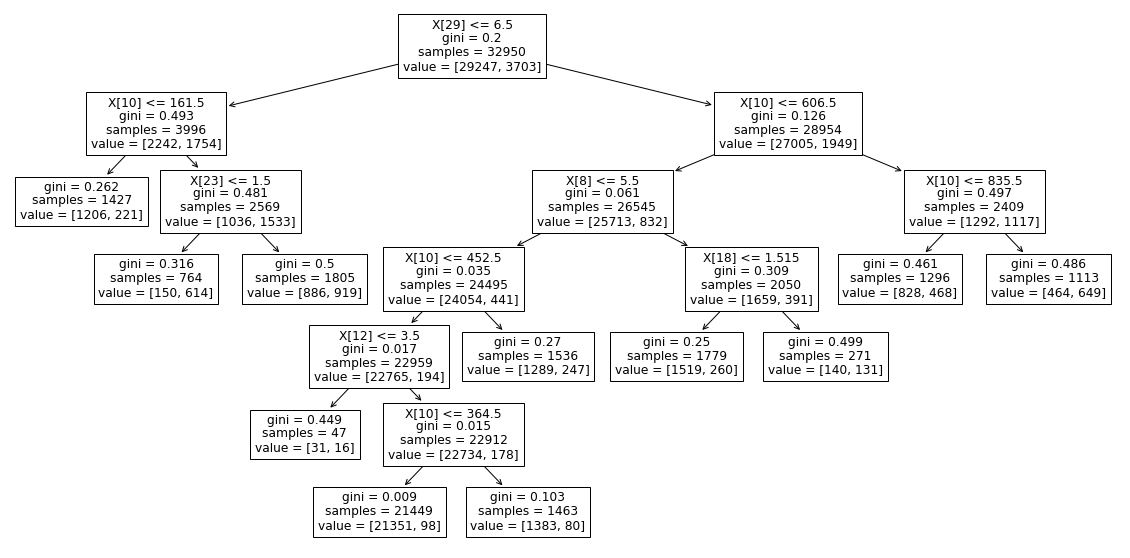

In [87]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt);

# Comparision and observations from visualizing the splits

#### The custom made decision tree using WOE and logistic regression generates rules based on probabilities as thresholds.

#### However, the normal decision tree generates rules using attribute values as thresholds

#### This is evident from the visualizations provided above

# Q3:

## Model using 5 fold Cross validation

In [88]:
from sklearn.model_selection import cross_val_predict
y_pred_cv=cross_val_predict(dt,X,Y,cv=5)

#print the accuracy score
accuracy_score(Y, y_pred_cv)

# Print the classification report containing precision, recall, f1-score, support
print(metrics.classification_report(Y, y_pred_cv))

#print the ROC_AUC score
print(roc_auc_score(Y, y_pred_cv))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     36548
           1       0.59      0.60      0.60      4640

    accuracy                           0.91     41188
   macro avg       0.77      0.77      0.77     41188
weighted avg       0.91      0.91      0.91     41188

0.7745148444369805


## Student t test for single attribute 

In [89]:
import scipy.stats as stats
 
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=Y_test, b=Y_pred1, equal_var=True)

Ttest_indResult(statistic=array([26.56991957]), pvalue=array([2.41182871e-152]))

Two sample t-test has the following hypothesis:

H0 => µ1 = µ2 (population mean of given class labels is equal to the mean of the predicted class labels)

HA => µ1 ≠µ2 (population mean of given class labels is different from the mean of the predicted class labels)

Here, since the p-value (2.41182871e-152) is less than alpha = 0.05 so we reject the null hypothesis (H0) of the test.

## Student t test for two attributes 

In [90]:
import scipy.stats as stats
 
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=Y_test, b=Y_pred2, equal_var=True)

Ttest_indResult(statistic=array([26.56991957]), pvalue=array([2.41182871e-152]))

Two sample t-test has the following hypothesis:

H0 => µ1 = µ2 (population mean of given class labels is equal to the mean of the predicted class labels)

HA => µ1 ≠µ2 (population mean of given class labels is different from the mean of the predicted class labels)

Here, since the p-value (2.41182871e-152) is less than alpha = 0.05 so we reject the null hypothesis (H0) of the test.

In [91]:
# Since the accuracy of both the models is similar ,the poosible reason for this may be that when we are taking two 
# attributes for making the model both of them are possibly correlated with each other.

#Hence, the presence of two attributes per node versus one attribute per node both are generating similar results in terms
# of precision, recall, F1 score and accuracy .